In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The need for time - correlation functions

* Time correlation functions are important when analyzing time series data.
* An example is shown below

### Generating non-correlated time series data

In [5]:
nsteps = 10000
time_series = []

In [10]:
for i in range(nsteps):
    time_series.append(np.random.uniform(0, 1))
time_series = np.array(time_series)

* This time series data consists of points sampled from a uniform distribution
* There is no correlation between $x(t)$ and $x(t + 1)$

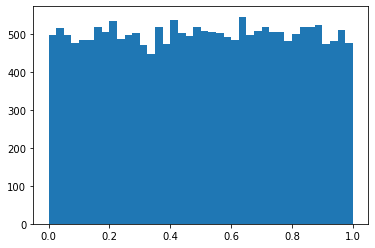

In [13]:
_ = plt.hist(time_series, bins = 40)

* Plotting the auto-correlation function $c(t)$ for the above data

In [21]:
def auto_correlation(data, t):
    """
    Args -
    data : 1-d numpy time series data
    t : the time-lag, should be an integer in the range [0, len)
    
    Return value - 
    The auto-correlation function c(t)
    """
    len_data = len(data[t:])
    mean = data.mean()
    num = (data[:len_data] * data[t:t + len_data]).mean() - mean**2
    var = (data**2).mean() - (mean)**2
    return num / var
    

In [45]:
taus = np.arange(0, 250)
auto_corrs = np.array([auto_correlation(time_series, tau) for tau in taus])

Text(0, 0.5, 'c(t)')

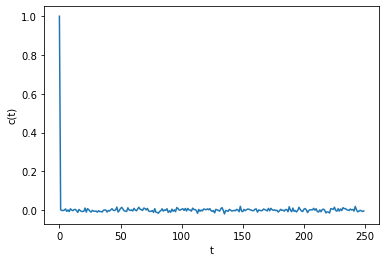

In [46]:
plt.plot(taus, auto_corrs)
plt.xlabel('t')
plt.ylabel('c(t)')

* This auto-correlation function can be written as a delta-function, $c(\tau) = <x(t) . x(t + \tau)> = \delta(\tau)$ 

### Generating correlated time series data, and its autocorrelation

* Generating data such that $x(t + 1) = (0.95 * x(t) + 2 * random)$

In [47]:
coor_ts = []
prev = 0.
for i in range(0,10001):
    new = 0.95*prev + 2*np.random.uniform(0,1)
    coor_ts.append(new)
    prev = new
coor_ts = np.array(coor_ts)

In [48]:
taus = np.arange(0, 250)
auto_corrs_new = np.array([auto_correlation(coor_ts, tau) for tau in taus])

Text(0, 0.5, 'c(t)')

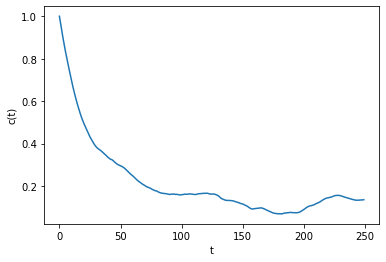

In [49]:
plt.plot(taus, auto_corrs_new)
plt.xlabel('t')
plt.ylabel('c(t)')

* The correlation function drops to 0 almost immediately as t increases for non-correlated data, but decreases gradually for correlated data.
* The area under this curve, $t_c = \int c(t) dt$, is an indicator of how much time it would take for the system to become memory less, i.e. it would be almost impossible to determine the value of x(0) from x(t_c).